# Topic Modelling with Latent Dirichlet Allocation (LDA)

Topic modeling is a type of statistical modeling for discovering the topics that occur in a collection of documents. By doing topic modeling, we build clusters of words rather than clusters of texts.

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- psi, the distribution of words for each topic K

- phi, the distribution of topics for each document i

In [8]:
import sys
print(sys.executable)

C:\Users\choij\anaconda3\envs\iowa_proj3\python.exe


## Tokenize text for LDA
To use ```space.load('en')```, download it using the following:

```python3 -m spacy download en```

In [10]:
import spacy

# spacy.load('en')
spacy.load("en_core_web_sm")
# nlp=spacy.load("en_core_web_sm")

from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        # elif token.like_url:
        #     lda_tokens.append('URL')
        # elif token.orth_.startswith('@'):
        #     lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\choij\anaconda3\envs\iowa_proj3\python.exe"
  * The NumPy version is: "1.20.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


## Lemmatization using NLTK WordNet

Using ```WordNetLemmatizer``` to get the root word.

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\choij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Getting a list of StopWords 

In [3]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\choij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text pre-processing

Following steps are followed for text pre-processing before using LDA:

1. Tokenize text using our tokenizer above
1. Remove tokens of length less than 4
1. Remove tokens that are stop words
1. Reduce tokens to their base form using our Lemmatizer above

In [4]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [(token) for token in tokens]
    return tokens


## Processing Pubmed Articles

In [5]:
import random
import pandas as pd

text_data = []
# pubmed_dataset = pd.read_csv('Pubmed_Articles.csv', encoding = "ISO-8859-1")
pubmed_dataset = pd.read_csv('../COVID-Dataset/metadata_April10_2020.csv', encoding = "ISO-8859-1")
print("Total Articles: ", len(pubmed_dataset))


Total Articles:  51078


In [6]:
for index, row in pubmed_dataset.iterrows():
    tokens = prepare_text_for_lda(str(row['title'])+str(row['abstract']))
    if random.random() > .99:
        print(tokens)
    text_data.append(tokens)

ozyme', 'trypsin', 'chymotrypsin', 'pepsin', 'yielded', 'several', 'peptide', 'fragments', 'antiherpetic', 'activity', 'chemical', 'modification', 'peptide', 'fragments', 'generated', 'peptides', 'antiviral', 'activity', 'however', 'almost', 'always', 'combined', 'cytotoxic', 'effect', 'cells', 'overall', 'results', 'suggest', 'targeted', 'chemical', 'modification', 'natural', 'products', 'might', 'provide', 'compounds', 'effective', 'hsv-1', 'infection']
['systematic', 'biophysical', 'insights', 'interaction', 'ribavirin', 'major', 'transport', 'protein', 'human', 'serum', 'vitro', 'studies', 'implications', 'diabetes', 'uremianan']
['epidemiology', 'viral', 'respiratory', 'infections', 'tertiary', 'centre', 'molecular', 'diagnosis', 'geneva', 'switzerland', '2011â\x80\x932012abstract', 'studies', 'examined', 'epidemiology', 'respiratory', 'viral', 'infections', 'large', 'tertiary', 'centres', 'season', 'molecular', 'diagnosis', 'respiratory', 'clinical', 'specimens', 'received', 'jan

## Creating BOW with Dictionary

Doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples

In [7]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
#lecture 4/8/21: around 12:00
corpus = [dictionary.doc2bow(text) for text in text_data]
print(len(corpus))
print(corpus[0])
print("-----")
print(corpus[1])
print("-----")
print(corpus[2])
print("-----")
print(corpus[3])

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('../our_data/dictionary.gensim')

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\choij\anaconda3\envs\iowa_proj3\python.exe"
  * The NumPy version is: "1.20.2"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


## Training LDA model

In [15]:
import time
import gensim
from datetime import datetime

NUM_TOPICS = [5,6,7,8,9,10]
for each in NUM_TOPICS:
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("Current Time =", current_time)
    tic = time.perf_counter()
    print(tic)
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=each, id2word=dictionary, passes=15, random_state=42)
    name='model_'+str(each)+'.gensim'
    # print(name)
    ldamodel.save(name)
    topics=ldamodel.print_topics(num_words=10)
    for topic in topics: 
        print(topic)
        print("------")
    toc = time.perf_counter()
    print(toc)
    with open("log.txt", "a") as log:
        log.write(f"Finished the traversing of {each} topics in {toc - tic:0.4f} seconds")
        log.write("\n")

1359.0574982
(0, '0.021*"virus" + 0.009*"vaccine" + 0.008*"viruses" + 0.008*"samples" + 0.007*"detection" + 0.007*"coronavirus" + 0.006*"calves" + 0.006*"antibody" + 0.006*"antibodies" + 0.006*"strains"')
------
(1, '0.024*"cells" + 0.018*"infection" + 0.012*"virus" + 0.011*"immune" + 0.009*"viral" + 0.009*"expression" + 0.008*"induced" + 0.008*"response" + 0.006*"infected" + 0.006*"responses"')
------
(2, '0.020*"protein" + 0.016*"virus" + 0.011*"viral" + 0.010*"proteins" + 0.007*"coronavirus" + 0.006*"viruses" + 0.006*"binding" + 0.006*"activity" + 0.006*"cells" + 0.005*"replication"')
------
(3, '0.026*"patients" + 0.025*"respiratory" + 0.010*"clinical" + 0.010*"infection" + 0.010*"infections" + 0.009*"acute" + 0.009*"cases" + 0.008*"virus" + 0.008*"influenza" + 0.008*"severe"')
------
(4, '0.013*"health" + 0.008*"disease" + 0.006*"diseases" + 0.006*"infectious" + 0.005*"control" + 0.005*"public" + 0.005*"based" + 0.005*"transmission" + 0.004*"outbreak" + 0.004*"model"')
------
1743

In [14]:
# import gensim
# NUM_TOPICS = 5
# ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state=42)
# ldamodel.save('model5.gensim')
# topics=ldamodel.print_topics(num_words=10)
# for topic in topics: 
#     print(topic)
#     print("------")

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

## Compute Model Perplexity and Coherence Score

In [16]:
from gensim.models.coherencemodel import CoherenceModel

# Perplexity
# It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
# Measures score of topics by measuring the degree of semantic similarity between high scoring words in the topic.
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.879348738888527

Coherence Score:  0.5840254825614839


Not Often used to pick LDA model. As per https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

"However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated."

## Finding Model with Optimal K - Number of Topics

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity = model.log_perplexity(corpus)

        perplexity_values.append(perplexity)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

In [14]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=2)

## Coherence

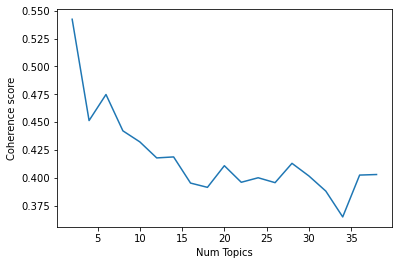

In [16]:
from matplotlib import pyplot as plt

# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

## Perplexity

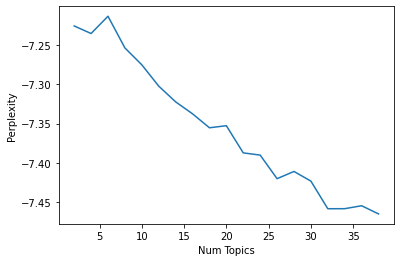

In [17]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")

plt.show()

## Top words in each Topic

In [18]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print('----------------------')

(0, '0.042*"cells" + 0.037*"il-18" + 0.026*"tumor" + 0.016*"il-12" + 0.013*"gamma" + 0.010*"antitumor" + 0.009*"cancer" + 0.007*"effect" + 0.007*"induced" + 0.007*"production"')
----------------------
(1, '0.017*"cells" + 0.010*"gamma" + 0.010*"patients" + 0.006*"production" + 0.005*"activity" + 0.005*"expression" + 0.005*"interferon" + 0.004*"clinical" + 0.004*"levels" + 0.004*"treatment"')
----------------------
(2, '0.023*"responses" + 0.017*"vaccine" + 0.016*"hiv-1" + 0.014*"specific" + 0.011*"gamma" + 0.010*"virus" + 0.009*"patients" + 0.008*"infected" + 0.008*"immune" + 0.008*"cells"')
----------------------
(3, '0.017*"cells" + 0.015*"infection" + 0.015*"gamma" + 0.012*"hiv-1" + 0.010*"specific" + 0.009*"infected" + 0.008*"responses" + 0.007*"patients" + 0.006*"expression" + 0.006*"associated"')
----------------------


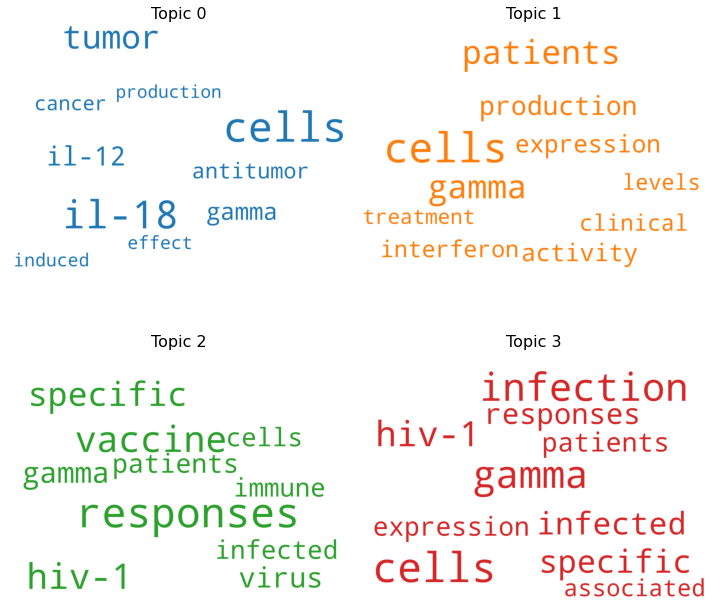

In [22]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Testing on new document

In [23]:
new_doc = 'Increase in efficacy of cancer radiotherapy by combination with whole-body low dose irradiation'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(13, 1), (15, 1), (26, 1), (41, 1), (46, 1), (72, 1), (96, 1)]
[(0, 0.5564435), (1, 0.03187397), (2, 0.033370055), (3, 0.3783124)]


## Creating Visualization for Topics

In [25]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

ModuleNotFoundError: No module named 'pyLDAvis.gensim'